# #1
Для системы, заданной передаточной функцией:
$$W(s)=\frac{k\cdot10^{~4}\cdot(T_1s+1)}{s(T_2s+1)(T_3s+1)(T_4s+1)}=kW_0(s);~T_1 = 10;~T_2 = 1;~T_3 = 0.1;~T_4 = 0.01$$

а) При $k = 1000$ определить запасы устойчивости

In [1]:
import numpy, matplotlib.pyplot

T1 = 10; T2 = 1; T3 = 0.1; T4 = 0.01

def W(s, k):
    return 1e4 * k * (T1*s + 1) / (s * (T2*s + 1) * (T3*s + 1) * (T4*s + 1))

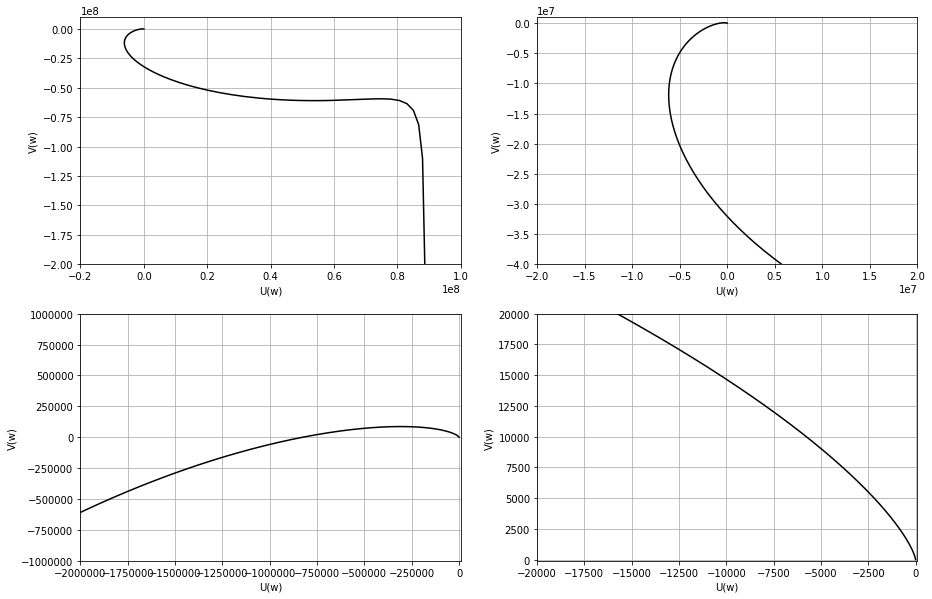

In [2]:
a = numpy.array([W(1j*omega, 1000) for omega in numpy.arange(0.05, 5000, 0.05)])

matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(221)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-2e7, 1e8, -2e8, 1e7])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(222)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-2e7, 2e7, -4e7, 1e6])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(223)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-2e6, 1e4, -1e6, 1e6])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(224)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-2e4, 100, -100, 2e4])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.show()

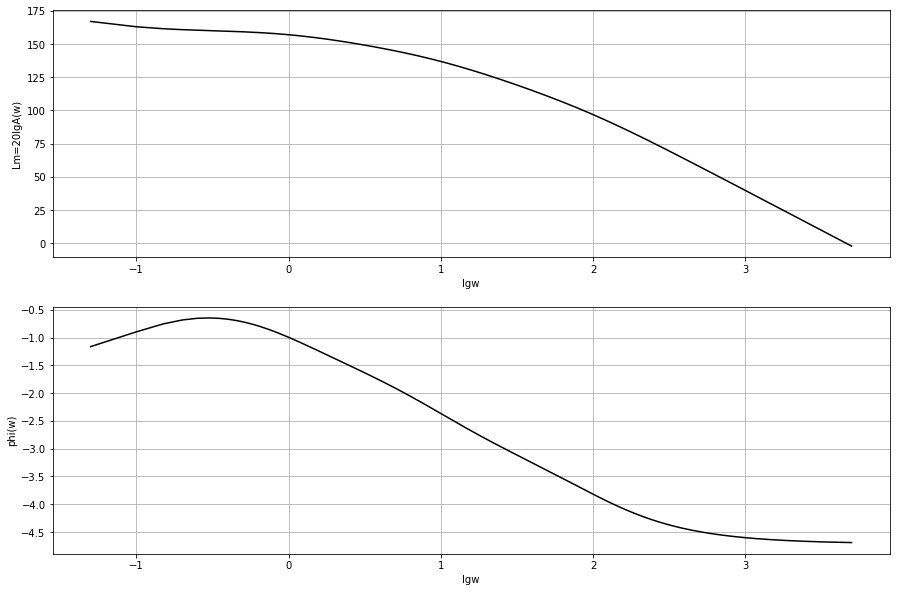

In [3]:
matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(211)
matplotlib.pyplot.plot(numpy.log10(numpy.arange(0.05, 5000, 0.05)), 20*numpy.log10(numpy.abs(a)), 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel('lgw')
matplotlib.pyplot.ylabel('Lm=20lgA(w)')

matplotlib.pyplot.subplot(212)
phi = numpy.array([angle - (2*numpy.pi if (angle > 0) else 0) for angle in numpy.angle(a)])
matplotlib.pyplot.plot(numpy.log10(numpy.arange(0.05, 5000, 0.05)), phi, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel('lgw')
matplotlib.pyplot.ylabel('phi(w)')

matplotlib.pyplot.show()

По критерию Найквиста, **система неустойчива** при $k=1000$. Видно, что АФХ пересекает вещественную ось в двух точках. Найдем корни $\omega_0$ и $\omega_1$ уравнения $\Im{W(i\omega)}=0$. 

In [4]:
def derivative(function, x, augmentation):
    return (function(x + augmentation) - function(x))/augmentation

def newton(function, x, accuracy, augmentation):
    while abs(function(x)) > accuracy:
        x = x - function(x)/derivative(function, x, augmentation)
    return x

In [5]:
omega0 = newton(lambda omega: W(1j*omega, 1000).imag, 1,  0.00001, 0.01)
print(omega0)

33.151033054060235


$\omega_0 \sim 33.151$

In [6]:
omega1 = newton(lambda omega: W(1j*omega, 1000).imag, 100,  0.00001, 0.01)
print(omega1)

242845.06885286997


$\omega_1 \sim 242845$

Найдем отрицательные запасы устойчивости

Запас устойчивости по амплитуде равен $1 - |W(i\omega_0)|$

In [7]:
print(1 - numpy.abs(W(1j*omega0, 10)))

-8264.28249552


Запас устойчивости по частоте равен $\pi + \arg{W(i\omega_2)}$, $\omega_2$ найдем из уравнения $|W(i\omega_2)| = 1$

In [8]:
omega2 = newton(lambda omega: numpy.abs(W(1j*omega, 10)) - 1, 1,  0.00001, 0.01)
print(omega2)

998.320579308


Запас устойчивости по частоте равен:

In [9]:
print(numpy.pi + numpy.angle(W(1j*omega2, 10)) - 2 * numpy.pi)

-1.46004311693


б) Определить $k_0$ потери устойчивости

Очевидно, что значение $\omega_0$ не зависит от значений $k$. Следовательно, $\Re{W(i\omega_0)}=\Re{k_0W_0(i\omega_0)}=k_0\Re{W_0(i\omega_0)} = -1$, $\Re{W(i\omega_0)} < 0$ и, следовательно $k_0 = -\frac{1}{W_0(i\omega_0)}$

In [10]:
k0 = -1/W(omega0*1j, 1).real
print(k0)

0.001209880001732053


Получаем $k \sim 0.00121$

в) Построить корневой годограф

In [11]:
import control

T1 = 10; T2 = 1; T3 = 0.1; T4 = 0.01

def W(k):
    return control.tf([1e4*k*T1, 1e4*k], [T2*T3*T4, T2*T3 + T2*T4 + T3*T4, T2 + T3 + T4, 1, 0])

print(W(1))


          1e+05 s + 1e+04
------------------------------------
0.001 s^4 + 0.111 s^3 + 1.11 s^2 + s



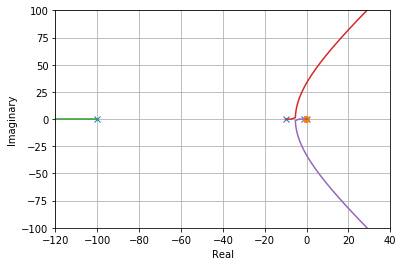

In [12]:
control.root_locus(W(1e-4))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-120, 40, -100, 100])
matplotlib.pyplot.show()

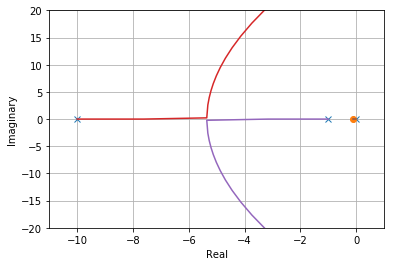

In [13]:
control.root_locus(W(0.000001013))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-11, 1, -20, 20])
matplotlib.pyplot.show()

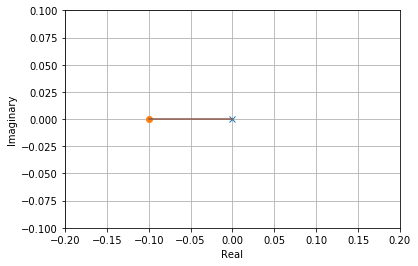

In [14]:
control.root_locus(W(1e-4))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-0.2, 0.2, -0.1, 0.1])
matplotlib.pyplot.show()